# Exercícios

Utilizando a plotagem com pandas, reproduzam as visualizações abaixo, tentando deixá-las o mais próximas quanto possível da maneira como estão postas. Para isso, atentem-se às personalizações dos gráficos, como títulos, legendas, eixos e outros tipos possíveis de formatações e preferências de visualizações dos dados. Também é interessante que vocês discutam possíveis pontos de melhorias dessas visualizações!

**Exercício 1.** Reproduza o gráfico de barras abaixo, em que cada barra representa um dos 10 países com mais casos confirmados de COVID no dataset, e a "quebra" em cada cor indica a predominância de casos confirmados em cada mês.

In [1]:
import pandas as pd
import datetime

In [11]:
df = pd.read_csv('Covid_19_Countrywise_timeseries.csv')
df['date'] = pd.to_datetime(df['ObservationDate'])
df['month'] = pd.DatetimeIndex(df['date']).to_period('M')
df.head()

,Unnamed: 0,ObservationDate,country,Confirmed,Deaths,Recovered,Code,latitude,longitude,New Confirmed,New Recovered,New Death,date,month
0,1063,02/28/2020,azerbaijan,1,0,0,NaN,NaN,NaN,0,0,0,2020-02-28,2020-02
1,2055,03/10/2020,"('st. martin',)",2,0,0,NaN,NaN,NaN,2,0,0,2020-03-10,2020-03
2,869,02/24/2020,afghanistan,1,0,0,AF,33.93911,67.709953,1,0,0,2020-02-24,2020-02
3,909,02/25/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-25,2020-02
4,955,02/26/2020,afghanistan,1,0,0,AF,33.93911,67.709953,0,0,0,2020-02-26,2020-02


In [15]:
# solução sugerido por Bruno (durante a aula)
matriz_filtrada = pd.pivot_table(df, values = 'Confirmed', index = 'country', columns = 'month', aggfunc = 'sum').fillna(0)
matriz_filtrada = matriz_filtrada.sort_values('2020-03', ascending=False)[:10]
matriz_filtrada

month,2020-01,2020-02,2020-03
country,,,
china,37897.0,1631535.0,2262366.0
italy,2.0,3966.0,901901.0
us,37.0,718.0,595832.0
spain,0.0,151.0,478392.0
iran,0.0,1617.0,401538.0
germany,17.0,561.0,387391.0
france,30.0,466.0,270964.0
south korea,36.0,12128.0,215824.0
switzerland,0.0,36.0,107745.0


<Axes: ylabel='country'>

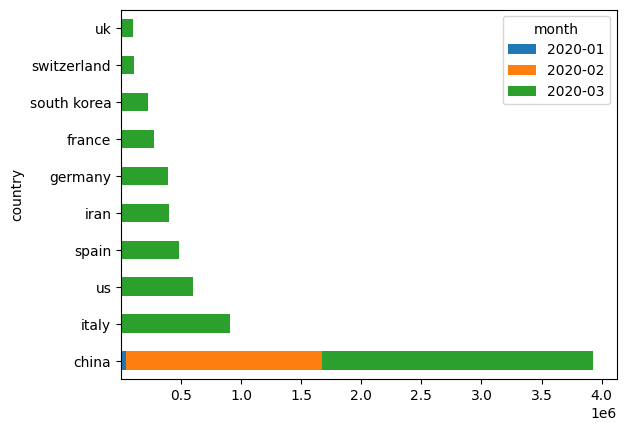

In [16]:
matriz_filtrada.plot(kind='barh', stacked=True)

In [18]:
#outra opção, sugerida pelo professor
df.groupby(['country', 'month'])['Confirmed'].sum().unstack().fillna(0)

month,2020-01,2020-02,2020-03
country,,,
azerbaijan,0.0,1.0,0.0
"('st. martin',)",0.0,0.0,2.0
afghanistan,0.0,6.0,755.0
albania,0.0,0.0,1554.0
algeria,0.0,5.0,3012.0
...,...,...,...
venezuela,0.0,0.0,907.0
vietnam,18.0,398.0,1911.0
west bank and gaza,0.0,0.0,273.0


<AxesSubplot:ylabel='country'>

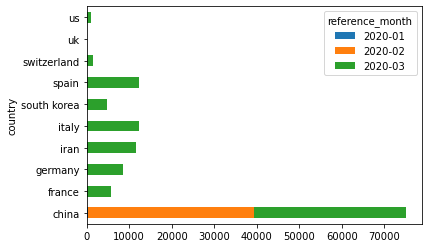

In [145]:
# o que se espera de output

Para os exercícios abaixo, vamos trabalhar com um dataset de [emissão de CO2 por país, ao longo do tempo](https://www.kaggle.com/datasets/ulrikthygepedersen/co2-emissions-by-country).

**Exercício 2.** Reproduza o gráfico de linhas abaixo, que representa a série temporal da evolução de emissões de CO2 no Brasil.

<AxesSubplot: title={'center': 'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

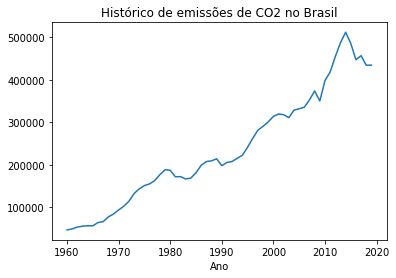

In [7]:
# output esperado

In [20]:
df_2 = pd.read_csv('co2_emissions_kt_by_country.csv')
df_2.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


<Axes: title={'center': 'Histórico de emissões de CO2 no Brasil'}, xlabel='Ano'>

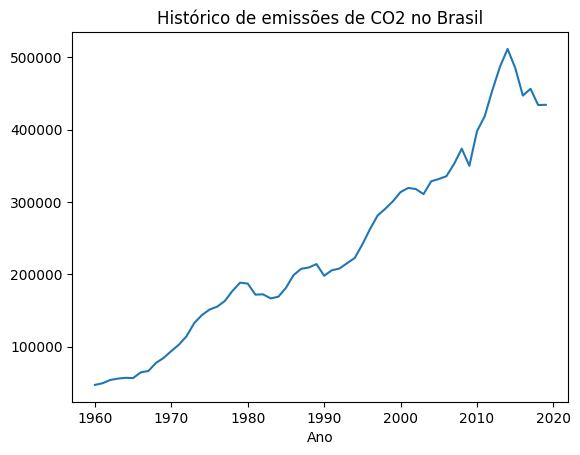

In [21]:
df_2[df_2['country_name']=='Brazil'].plot(title = 'Histórico de emissões de CO2 no Brasil', x = 'year', y = 'value', xlabel = 'Ano', legend = False)

**Exercício 3**. Uma visualização muito similar à anterior, mas com a adição da média global de emissão de CO2 (o Brasil deve ser incluído na linha da média global?).

<Axes: title={'center': 'Histórico de emissões de CO2 no Brasil versus Média Global'}, xlabel='year'>

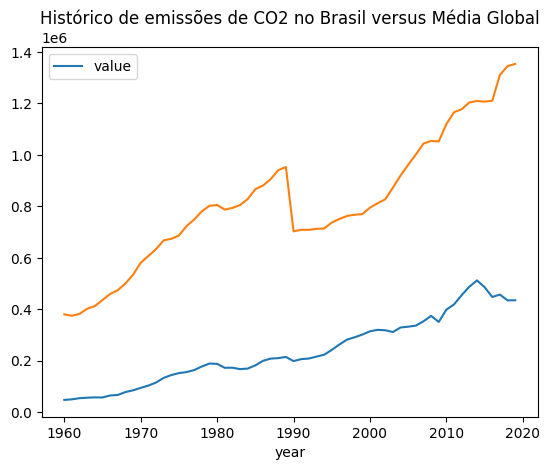

In [23]:
ax = df_2[df_2['country_name']=='Brazil'].plot(title = 'Histórico de emissões de CO2 no Brasil versus Média Global', x = 'year', y = 'value', xlabel = 'Ano')

df_2.groupby('year')['value'].mean().plot(ax = ax)

<Axes: >

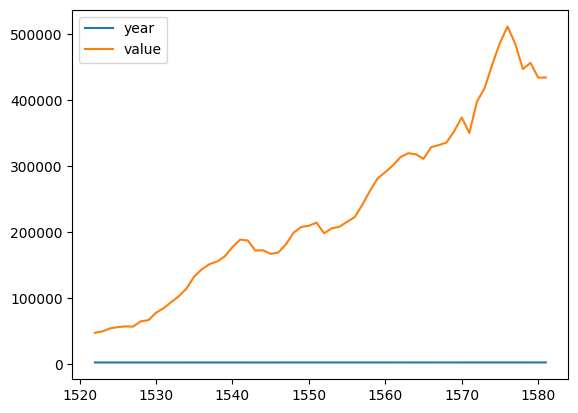

In [24]:
# outra opção (ele já imprime as duas, mas precisa ter a coluna com a média global)
df_2[df_2['country_name']=='Brazil'].plot()

**Exercício 4.** Os 10 países que mais aumentaram, percentualmente, a emissão de CO2 entre os anos de 2018 e 2019, na forma de um gráfico de barras horizontal.

In [ ]:
# pra ter o top 10 usa o sort_values e depois uns slice [0:10], tipo exercicio 1

In [25]:
df_2.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [26]:
# filtrar apenas para aparecer info de países que tenham dados em 2018 e 2019
df_2018 = df_2.loc[(df_2['year']==2018)]
df_2019 = df_2.loc[(df_2['year']==2019)]
df_2019
# country_name tem 239 em ambos os datasets de ano

,country_code,country_name,year,value
116,AFE,Africa Eastern and Southern,2019,603030.016154
176,AFG,Afghanistan,2019,6079.999924
236,AFW,Africa Western and Central,2019,220740.000024
296,AGO,Angola,2019,25209.999084
356,ALB,Albania,2019,4829.999924
...,...,...,...,...
13711,WSM,Samoa,2019,300.000012
13780,YEM,"Yemen, Rep.",2019,11100.000381
13840,ZAF,South Africa,2019,439640.014648
13896,ZMB,Zambia,2019,6800.000191


In [27]:
#verifica se são os mesmos países em ambos os datasets criados
df_2018['country_name'].unique().tolist() == df_2019['country_name'].unique().tolist()

True

In [28]:
float(df_2019.loc[df_2019['country_name'] == 'Angola', 'value'])

25209.9990844727

In [29]:
# teste de cálculo do percenetual de aumento para o país Angola
(float(df_2019.loc[df_2019['country_name'] == 'Angola', 'value']) / float(df_2018.loc[df_2018['country_name'] == 'Angola', 'value']))*100 - 100

5.217028579980479

In [47]:
list(dict_percentuais.keys())

['Africa Eastern and Southern',
 'Afghanistan',
 'Africa Western and Central',
 'Angola',
 'Albania',
 'Andorra',
 'Arab World',
 'United Arab Emirates',
 'Argentina',
 'Armenia',
 'Antigua and Barbuda',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Burundi',
 'Belgium',
 'Benin',
 'Burkina Faso',
 'Bangladesh',
 'Bulgaria',
 'Bahrain',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'Belarus',
 'Belize',
 'Bolivia',
 'Brazil',
 'Barbados',
 'Brunei Darussalam',
 'Bhutan',
 'Botswana',
 'Central African Republic',
 'Canada',
 'Central Europe and the Baltics',
 'Switzerland',
 'Chile',
 'China',
 "Cote d'Ivoire",
 'Cameroon',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Colombia',
 'Comoros',
 'Cabo Verde',
 'Costa Rica',
 'Caribbean small states',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Germany',
 'Djibouti',
 'Dominica',
 'Denmark',
 'Dominican Republic',
 'Algeria',
 'East Asia & Pacific (excluding high income)',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'Europe & Central Asia (excluding

In [48]:
#lista com todos os países
countries_list = df_2018['country_name'].unique().tolist()

dict_percentuais = {}

#for que cria um dicionário com o país e aumento percentual de 2018 para 2019
for country in countries_list:
    perc = (float(df_2019.loc[df_2019['country_name'] == country, 'value']) / float(df_2018.loc[df_2018['country_name'] == country, 'value']))*100 - 100
    dict_percentuais[country] = round(perc, 2)

print(dict_percentuais)

dict_aux = {'country':list(dict_percentuais.keys()),'percentage':list(dict_percentuais.values())}
# converte o dicionário para um DataFrame
df_percentuais = pd.DataFrame.from_dict(dict_aux)
df_percentuais

{'Africa Eastern and Southern': 2.2, 'Afghanistan': 0.16, 'Africa Western and Central': 4.26, 'Angola': 5.22, 'Albania': -5.48, 'Andorra': 2.04, 'Arab World': 2.69, 'United Arab Emirates': 6.63, 'Argentina': -4.97, 'Armenia': 8.06, 'Antigua and Barbuda': 1.96, 'Australia': -0.14, 'Austria': 2.71, 'Azerbaijan': 8.49, 'Burundi': 4.35, 'Belgium': -0.69, 'Benin': -1.62, 'Burkina Faso': 7.07, 'Bangladesh': 8.74, 'Bulgaria': -4.3, 'Bahrain': 7.95, 'Bahamas, The': 1.43, 'Bosnia and Herzegovina': -6.77, 'Belarus': -2.17, 'Belize': 1.59, 'Bolivia': -3.83, 'Brazil': 0.07, 'Barbados': 0.81, 'Brunei Darussalam': -7.29, 'Bhutan': 0.0, 'Botswana': -0.82, 'Central African Republic': 4.35, 'Canada': 0.02, 'Central Europe and the Baltics': -4.75, 'Switzerland': -0.27, 'Chile': 5.5, 'China': 1.95, "Cote d'Ivoire": 6.28, 'Cameroon': -1.67, 'Congo, Dem. Rep.': 2.88, 'Congo, Rep.': 11.86, 'Colombia': 3.12, 'Comoros': 6.67, 'Cabo Verde': 6.56, 'Costa Rica': -1.55, 'Caribbean small states': -0.03, 'Cuba': -3

,country,percentage
0,Africa Eastern and Southern,2.20
1,Afghanistan,0.16
2,Africa Western and Central,4.26
3,Angola,5.22
4,Albania,-5.48
...,...,...
234,Samoa,3.45
235,"Yemen, Rep.",14.20
236,South Africa,1.22
237,Zambia,-12.03


In [57]:
# filtra os top 10 países
df_percentuais = df_percentuais.sort_values(by = 'percentage', ascending=True)[-10:]
df_percentuais

,country,percentage
144,Myanmar,11.48
40,"Congo, Rep.",11.86
141,North Macedonia,13.70
235,"Yemen, Rep.",14.20
190,El Salvador,14.54
231,Vietnam,17.82
198,Suriname,19.91
135,Madagascar,22.99
108,Kenya,27.39
167,Panama,32.60


<Axes: title={'center': 'Top 10 países com maiores aumentos percentuais de emissão entre 2018 e 2019'}, ylabel='country'>

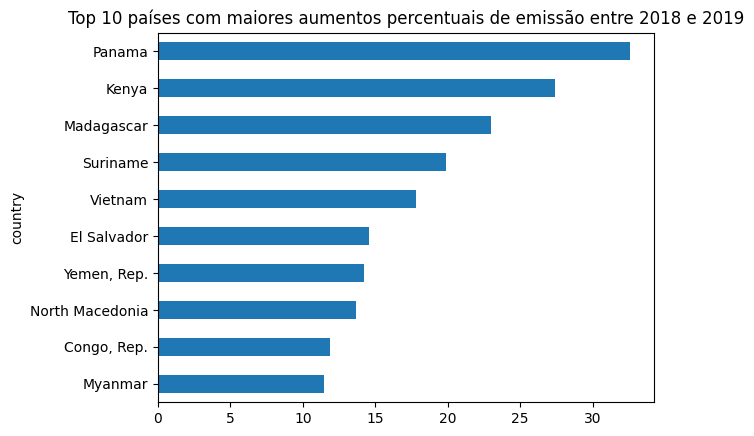

In [59]:
df_percentuais.plot(kind='barh', x='country', y='percentage',
                    title='Top 10 países com maiores aumentos percentuais de emissão entre 2018 e 2019',
                    legend=False)

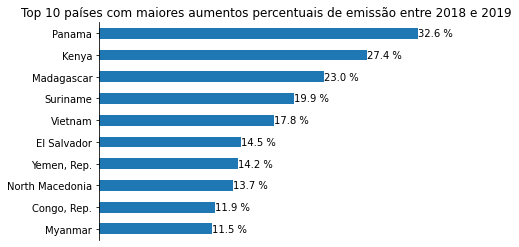

In [77]:
# output esperado